In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:/Users/赵豪杰/Desktop/lw/data/违规信息总表162458463/STK_Violation_Main.csv', error_bad_lines=False)
data = data[~data['ViolationType'].isna()]

b'Skipping line 32: expected 21 fields, saw 24\nSkipping line 78: expected 21 fields, saw 65\nSkipping line 239: expected 21 fields, saw 43\nSkipping line 337: expected 21 fields, saw 28\nSkipping line 341: expected 21 fields, saw 26\nSkipping line 380: expected 21 fields, saw 25\nSkipping line 438: expected 21 fields, saw 38\nSkipping line 959: expected 21 fields, saw 26\nSkipping line 1426: expected 21 fields, saw 23\nSkipping line 1543: expected 21 fields, saw 23\nSkipping line 1746: expected 21 fields, saw 23\nSkipping line 2087: expected 21 fields, saw 26\nSkipping line 2325: expected 21 fields, saw 92\nSkipping line 2649: expected 21 fields, saw 22\nSkipping line 3858: expected 21 fields, saw 47\nSkipping line 5263: expected 21 fields, saw 36\nSkipping line 5544: expected 21 fields, saw 25\nSkipping line 6390: expected 21 fields, saw 28\nSkipping line 6725: expected 21 fields, saw 32\nSkipping line 6975: expected 21 fields, saw 64\nSkipping line 7256: expected 21 fields, saw 29\n

<BarContainer object of 431 artists>

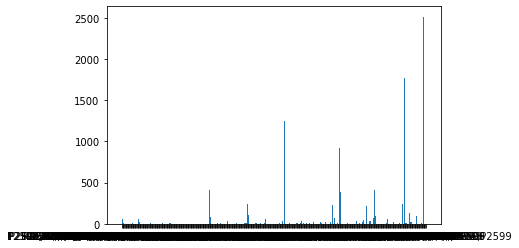

In [6]:
keep_name = ['ViolationID', 'ViolationType', 'ViolationTypeID', 'ViolationYear', 'DeclareDate']
group1 = data.groupby('ViolationTypeID')
group1.count()['ViolationID']
# # 按造假类型统计的条形图
plt.bar(group1.count()['ViolationID'].index, group1.count()['ViolationID'])

<BarContainer object of 2969 artists>

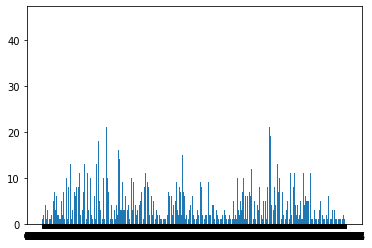

In [8]:
data['fraud'] = 1
group2 = data.groupby('Symbol')
group2.count()['ViolationID']
# 按公司ID统计公司违规处理次数条形图
plt.bar(group2.count()['ViolationID'].index, group2.count()['ViolationID'])

In [13]:
type_list = ['P2501','P2502','P2503','P2504','P2505', 'P2506']
data_fraud = data[data['ViolationTypeID'].isin(type_list)]
data_fraud = data_fraud[~data_fraud['ViolationYear'].isna()][['Symbol', 'ViolationYear', 'DeclareDate', 'fraud']]

,Symbol,ViolationYear,DeclareDate,fraud


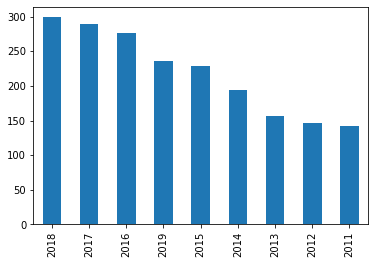

In [14]:
# 按行分割多个日期组合
data_fraud['ViolationYear'] = data_fraud['ViolationYear'].map(lambda x:x.split(','))
df = data_fraud.explode('ViolationYear')
df['ViolationYear'] = df['ViolationYear'].map(lambda x:x.split(';'))
df = df.explode('ViolationYear')
df['ViolationYear'].value_counts().plot.bar()


# 将字符串转换为时间
df['ViolationYear'] = df['ViolationYear'].map(lambda x: pd.to_datetime(x).year)
# 按年份筛选
df = df[(df['ViolationYear'] < 2020) & (df['ViolationYear'] > 2010)]
df['ViolationYear'].value_counts().plot.bar()
df['Symbol'].value_counts()

In [27]:
# 剔除年份相同的
from tkinter.tix import Tree


df[df['Symbol'] == '600610']
df.drop_duplicates(['Symbol', 'ViolationYear'], inplace=True)
df[df['Symbol'] == '600610']

,Symbol,ViolationYear,DeclareDate,fraud
12311,600610,2015,2018-01-06,1
12315,600610,2018,2019-01-24,1
12315,600610,2019,2019-01-24,1
12323,600610,2016,2020-02-26,1


In [24]:
data[data['Symbol'] == '600610']['ViolationYear']

12308              2001
12309         2015,2016
12310         2016,2017
12311              2015
12312              2015
12313              2015
12314    2015,2017,2018
12315         2018,2019
12316              2018
12317              2018
12318              2018
12319              2019
12320         2018,2019
12321              2019
12322         2016,2017
12323              2016
12324              2016
12325              2016
12328         2016,2017
12329              2019
12330              2019
12332              2016
12334              2017
Name: ViolationYear, dtype: object

In [17]:
# 连接资产负债表 data2
data2 = pd.read_csv('C:/Users/赵豪杰/Desktop/lw/data/资产负债表160133267/FS_Combas.csv', error_bad_lines=False)
data2.columns[:15]
data2['Accper'] = data2['Accper'].map(lambda x: pd.to_datetime(x).year)
data2 = data2[(data2['Accper'] > 2010) & (data2['Accper'] < 2020)]
# df.dtypes 查看类型
df['Symbol'] = df['Symbol'].astype(int)


In [31]:
data_all = pd.merge(df, data2, left_on=['Symbol', 'ViolationYear'], right_on=['Stkcd', 'Accper'], how='inner')
data_all[['Symbol', 'ViolationYear']].value_counts()

Symbol  ViolationYear
409     2018             50
600680  2014             50
2259    2019             50
635     2017             50
600610  2019             50
                         ..
603856  2017              4
300372  2013              4
601375  2016              4
300321  2012              4
870436  2017              4
Length: 1534, dtype: int64

<AxesSubplot:>

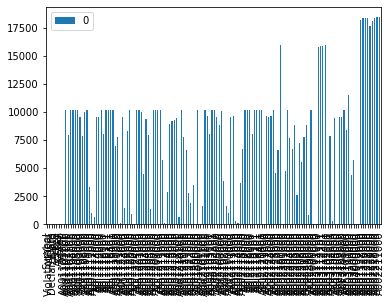

In [36]:
pd.DataFrame(data_all.drop_duplicates().isna().sum()).plot.bar()

<AxesSubplot:>

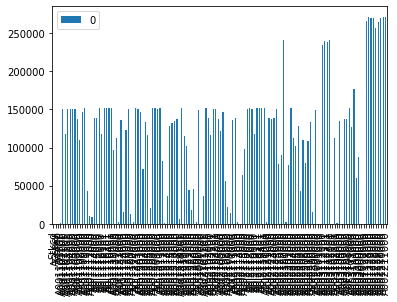

In [39]:
pd.DataFrame(data2.drop_duplicates().isna().sum()).plot.bar()

In [40]:
data2.size

37449474

In [43]:
df

,Symbol,ViolationYear,DeclareDate,fraud
0,2,2015,2016-07-21,1
0,2,2016,2016-07-21,1
8,4,2014,2018-08-16,1
8,4,2015,2018-08-16,1
8,4,2016,2018-08-16,1
...,...,...,...,...
15198,688015,2019,2020-11-18,1
15203,688030,2019,2020-11-04,1
15229,688135,2016,2021-08-12,1
15244,688188,2019,2021-03-11,1


In [46]:
data2

,Stkcd,Accper,Typrep,A001101000,A0d1101101,A0d1102000,A0d1102101,A0b1103000,A0b1104000,A0b1105000,...,A004000000,A001127000,A001128000,A001226000,A001227000,A001228000,A001229000,A002128000,A001230000,A002211000
68,1,2011,B,NaN,NaN,NaN,NaN,7.658686e+10,8.523729e+09,2000.0,...,7.272071e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,2011,A,0.00,NaN,0.0,NaN,7.658686e+10,8.523729e+09,2000.0,...,7.272071e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,1,2011,A,0.00,NaN,0.0,NaN,7.933548e+10,1.518595e+10,2000.0,...,8.075634e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,1,2011,A,0.00,NaN,0.0,NaN,9.549160e+10,1.905280e+10,2000.0,...,8.520570e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,1,2011,B,NaN,NaN,NaN,0.0,9.932419e+10,1.841786e+10,NaN,...,9.304591e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517000,900957,2019,A,7151661.26,NaN,NaN,NaN,NaN,NaN,NaN,...,1.012974e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517001,900957,2019,B,816290.53,NaN,NaN,NaN,NaN,NaN,NaN,...,5.496483e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517002,900957,2019,A,26526091.24,NaN,NaN,NaN,NaN,NaN,NaN,...,1.017417e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517003,900957,2019,B,660393.48,NaN,NaN,NaN,NaN,NaN,NaN,...,5.549938e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
